<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/Integrating_XAI_to_RGB_VIT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrating LIME

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [3]:
#Loading the newly trained VIT model
model = load_model('/content/drive/MyDrive/ViT_model_RGB_new.keras')

In [4]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a7a489c247230ed497e67b1f812ddeb119fe2b3689c985c1e06dfafcc71428eb
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [5]:
from tensorflow.keras.preprocessing import image

# Image Processing
from PIL import Image

# LIME for Explainability
from lime import lime_image
from skimage.segmentation import mark_boundaries

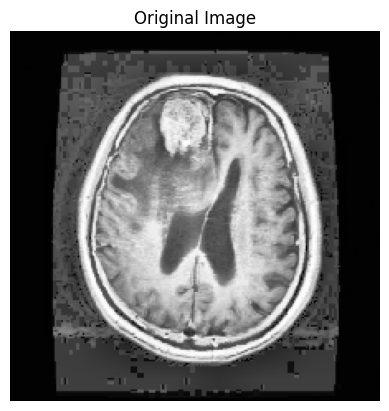

In [6]:
from tensorflow.keras.preprocessing.image import load_img
img_path = '/content/drive/MyDrive/Preprocessed_Dataset_classification/meningioma/image_30002.png'

# Load and display the image
img = load_img(img_path)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")  # Turn off axis
plt.show()

In [7]:
img = Image.open(img_path).resize((224,224)).convert('RGB')

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [8]:
class_indices = {0: 'Astrocitoma', 1: 'Carcinoma', 2: 'Ependimoma', 3: 'Ganglioglioma', 4: 'Germinoma', 5: 'Glioblastoma', 6: 'Granuloma', 7: 'Meduloblastoma', 8: 'Neurocitoma', 9: 'Oligodendroglioma', 10: 'Papiloma', 11: 'Schwannoma', 12: 'Tuberculoma', 13: 'meningioma', 14: 'no tumour', 15: 'pituitary'}
prediction = model.predict(img)
predicted_class = class_indices[np.argmax(prediction)]

print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The predicted class is: meningioma


In [9]:
# Initialize LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction for the image
explanation = explainer.explain_instance(
    img[0],  # Pass the image (without batch dimension)
    model.predict,
    top_labels=16,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━

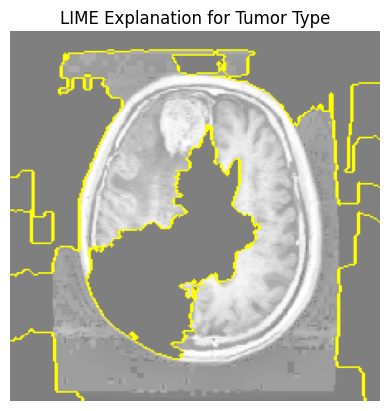

In [15]:
# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # The top predicted label index
    positive_only=True,
    num_features=20,  # Number of superpixels to display
    hide_rest=True
)

# Display the visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))  # Normalize temp for display
plt.title(f"LIME Explanation for Tumor Type")
plt.axis('off')
plt.show()

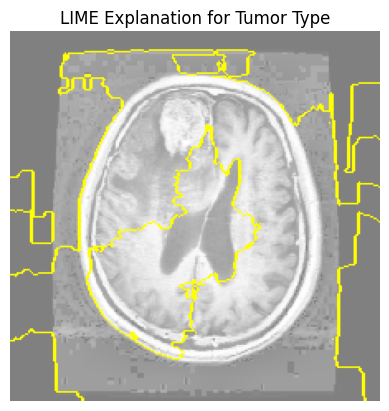

In [16]:
# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # The top predicted label index
    positive_only=True,
    num_features=20,  # Number of superpixels to display
    hide_rest=False
)

# Display the visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))  # Normalize temp for display
plt.title(f"LIME Explanation for Tumor Type")
plt.axis('off')
plt.show()

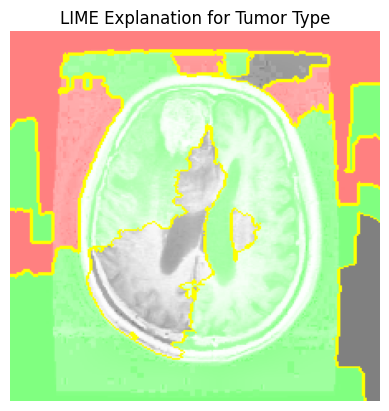

In [18]:
# Visualize the explanation for the top predicted label
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # The top predicted label index
    positive_only=False,
    num_features=30,  # Number of superpixels to display
    hide_rest=False
)

# Display the visualization
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))  # Normalize temp for display
plt.title(f"LIME Explanation for Tumor Type")
plt.axis('off')
plt.show()